---
### **Projeto preços de imóveis e suas metrícas**

Antes de escrever qualquer código, precisamos entender o problema que queremos resolver e fazer uma descrição eficiente do projeto, visando a comunicação simples e rápida do objetivo do projeto para técnicos, gestores e colaboradores.

**1- Nome do projeto (apelido)**

- Previsão de preço de imóveis no DF, SP e GO.

**2- Descrição do problema ou tarefa:**

- Ao se deparar com um imóvel em um anúncio, confirmar se o seu preço é justo.

**3- Descrição da solução de IA:**

- Treinamento supervisionado de modelo para realizar a previsão do valor de um imóvel situada no Distrito Federal, São Paulo e Goias.
- Comparação das metrçias dos preços de (3) três estados.

**4- Fonte de Pesquisa e dos dados:**

- Webscraping de sites tipo olx, dfimoveis e similares (apenas por curiosidade).
- link: https://www.kaggle.com/datasets/devvret/brazil-real-estate-listings
- link: https:/https://www.kaggle.com/code/mpwolke/brazil-real-state-listings
- link: https://www.kaggle.com/code/kerneler/starter-brazil-real-estate-listings-1017e2e5-3

**5- Base de dados/estrutura de dados:**

|#|Description| Field|Non-Null Count| Data type|X ou y|Drop
|-|-----------|:-----|:---------|:--------|:-------|:---|
| 0 ||Unnamed: 0|63 non-null|int64|-|*| 
| 1 ||created_on|63 non-null|object|-|*|
| 2 ||operation|63 non-null|object|-|*|
| 3 ||property_type|63 non-null|object|-|*|
| 4 ||place_name|63 non-null|object|-|*| 
| 5 ||place_with_parent_names|63 non-null|object|-|*| 
| 6 ||geonames_id|0 non-null|float64|-|*|
| 7 ||lat_lon|41 non-null|object|-|*|
| 8 ||lat|41 non-null|float64|-|*|
| 9 ||lon|41 non-null|float64|-|*|
| 10 ||price|63 non-null|float64|y|*|
| 11 ||currency|63 non-null|object|-|*|
| 12 ||price_aprox_local_currency|63 non-null|float64|X|*|
| 13 ||price_aprox_usd|63 non-null|float64|X||
| 14 ||surface_total_in_m2|16 non-null|float64|X|*|
| 15 ||surface_covered_in_m2|57 non-null|float64|X|*|
| 16 ||price_usd_per_m2|56 non-null|float64|X||
| 17 ||price_per_m2|56 non-null|float64|X||
| 18 ||floor|7 non-null|float64|X||
| 19 ||rooms|22 non-null|float64|X||
| 20 ||expenses|11 non-null|float64|-|*||
| 21 ||properati_url|63 non-null|object|-|*|
| 22 ||description|63 non-null|object|-|*|
| 24 ||image_thumbnail|63 non-null|object|-|*|
| 25 ||location|41 non-null|object|-|*|

- dtypes: float64(13), int64(1), object(12)


**6- Variáveis independentes (preditoras ou "features"):**

- Localização, metragem, quantidade de quartos, vagas de garagem, banheiros e etc.

**6- Variável dependente (resposta ou "target"):**

- Preço (price)
---

Data: 10/05/2023

Autor

- Pablo Alves - TST - pablo.alves@tst.jus.br

Participante:

- Fillipe Ballico de Moraes - ORGAO - EMAIL
- Carlos Roberto - SSPAL - carlos.silva@pm.al.gov.br // tenroberto2011@gmail.com

---


## Instalando e carregando as bibliotecas de código


In [95]:
# !pip install -U scikit_learn
#  pip install -U ydata-profiling
#  pip install -U plotly
#  pip install -U nbformat
#  pip install - U dtreeviz

In [96]:
# importar biblioteca Pandas
import pandas as pd

# importar Matplotlib biblioteca de gráficos
import matplotlib.pyplot as plt

# importar Seaborn biblioteca de gráficos
import seaborn as sns

# Importar Numpy, train_test_split
import numpy as np
from sklearn.model_selection import train_test_split

# importa o modelo de regressão linear, metrics, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.preprocessing import OrdinalEncoder

# acesso ao so e ao sys
import os, sys

# Garbage collector, para recuperar memória após carregar o dataset inicial
import gc

# controlar as notificações
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [97]:
# Usando no clab
if 'google.colab' in sys.modules:
      !pip install -q dtreeviz
      from google.colab import drive
      drive.mount("/content/gdrive")

### **I - Analise exploratória dos dados**


#### 1. Importando as Libs python e os dados .csv


In [98]:
# colab ou local no vscode
url = "./dados/properati-BR-2016-11-01-properties-sell.csv"

if 'google.colab' in sys.modules:
    url = "/content/gdrive/My Drive/Colab Notebooks/curso_ml/dados/properati-BR-2016-11-01-properties-sell.csv"

df = pd.read_csv(url, encoding="utf8", low_memory=False)

In [99]:
# Otimizar o uso da memória

def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

In [100]:
df = reduce_memory_usage(df, verbose=True)

Mem. usage decreased to 111.52 Mb (30.2% reduction)


In [101]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872672 entries, 0 to 872671
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  872672 non-null  object 
 1   operation                   872672 non-null  object 
 2   property_type               872672 non-null  object 
 3   place_name                  872672 non-null  object 
 4   place_with_parent_names     872672 non-null  object 
 5   geonames_id                 140 non-null     float32
 6   lat-lon                     387227 non-null  object 
 7   lat                         387227 non-null  float16
 8   lon                         387227 non-null  float16
 9   price                       819401 non-null  float32
 10  currency                    819382 non-null  object 
 11  price_aprox_local_currency  819401 non-null  float32
 12  price_aprox_usd             819401 non-null  float32
 13  surface_total_

(872672, 24)

In [102]:
# Verifica o total de valores nulos no dataset
df.isnull().sum()

created_on                         0
operation                          0
property_type                      0
place_name                         0
place_with_parent_names            0
geonames_id                   872532
lat-lon                       485445
lat                           485445
lon                           485445
price                          53271
currency                       53290
price_aprox_local_currency     53271
price_aprox_usd                53271
surface_total_in_m2           655738
surface_covered_in_m2         239432
price_usd_per_m2              283491
price_per_m2                  283491
floor                         821878
rooms                         330926
expenses                      639354
properati_url                      0
description                        0
title                              0
image_thumbnail                38665
dtype: int64

In [103]:
df.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,140.000,387227.000,387227.000,819401.000,819401.000,819401.000,216934.000,633240.000,589181.000,589181.000,50794.000,541746.000,233318.000
mean,4164137.500,NaN,NaN,855221.625,856126.188,267656.500,359.979,3604.781,2355.032,7531.080,29774.363,NaN,2563.283
std,1.756,0.000,0.000,1562380.125,1565906.875,489514.969,3117.842,2698697.000,31437.365,100533.039,6707493.500,0.000,86971.227
min,4164138.000,-33.688,-119.438,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
25%,4164138.000,-24.016,-48.469,300000.000,300354.625,93901.898,69.000,65.000,1134.732,3627.451,2.000,1.000,350.000
50%,4164138.000,-23.594,-46.688,500000.000,499063.844,156025.703,120.000,98.000,1579.760,5054.152,5.000,2.000,580.000
75%,4164138.000,-23.172,-46.469,900000.000,898314.938,280846.281,235.000,170.000,2323.050,7428.571,10.000,3.000,1000.000
max,4164138.000,36.875,48.094,160000000.000,159700432.000,49928228.000,200000.000,2147483648.000,9361543.000,30000000.000,1511706112.000,36.000,32000180.000


In [104]:
# Lista as variáveis independentes ("features")
df.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

#### 2. Engenharia de dados


##### 2.1 Iniciando


In [105]:
# Mostra o nome das colunas
print(list(df.columns))

['created_on', 'operation', 'property_type', 'place_name', 'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url', 'description', 'title', 'image_thumbnail']


In [106]:
df["floor"] = df["floor"].fillna(1)

In [107]:
# Apagar colunas
df.drop(
    columns=[
        "created_on",
        "operation",
        "currency",
        "geonames_id",
        "lat-lon",
        "lat",
        "lon",
        "expenses",
        "properati_url",
        "description",
        "title",
        "image_thumbnail",
        # "location",
    ],
    inplace=True,
)

In [108]:
# Colunas apos o drop
print(list(df.columns))

['property_type', 'place_name', 'place_with_parent_names', 'price', 'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms']


In [109]:
# Selecionar a cidade
cidade_test = "São Paulo"
df = df.query(
    'place_with_parent_names.str.contains("' + cidade_test + '")', engine="python"
)

In [110]:
# ajustar o tamnho maximo de quartos
df.query("rooms <= 10")
df.head(3)

,property_type,place_name,place_with_parent_names,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms
32,apartment,São Vicente,|Brasil|São Paulo|São Vicente|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,2.000
33,apartment,Ponta da Praia,|Brasil|São Paulo|Santos|Ponta da Praia|,230000.000,229569.344,71771.820,NaN,NaN,NaN,NaN,1.000,1.000
34,house,Guarujá,|Brasil|São Paulo|Guarujá|,400000.000,399251.062,124820.570,NaN,NaN,NaN,NaN,1.000,2.000


In [111]:
df.dropna(subset=["floor"], inplace=True)
df.dropna(subset=["rooms"], inplace=True)
df.dropna(subset=["price"], inplace=True)
df.dropna(subset=["price_per_m2"], inplace=True)
df.dropna(subset=["surface_total_in_m2"], inplace=True)
df.dropna(subset=["price_aprox_local_currency"], inplace=True)
df.dropna(subset=["price_aprox_usd"], inplace=True)
df.dropna(subset=["surface_covered_in_m2"], inplace=True)

In [112]:
# Converte para inteiro
df.floor = df.floor.astype(int)
df.rooms = df.rooms.astype(int)

In [113]:
df.head(3)

,property_type,place_name,place_with_parent_names,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms
794,apartment,Higienópolis,|Brasil|São Paulo|São Paulo|Higienópolis|,2000000.000,2019190.625,631273.250,260.000,180.000,3507.074,11111.111,12,3
795,apartment,Higienópolis,|Brasil|São Paulo|São Paulo|Higienópolis|,960000.000,969211.500,303011.156,160.000,109.000,2779.919,8807.340,1,3
796,apartment,Higienópolis,|Brasil|São Paulo|São Paulo|Higienópolis|,1300000.000,1312474.000,410327.625,197.000,130.000,3156.366,10000.000,11,3


In [114]:
df_corr = df.corr()
df_corr

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms
price,1.000,0.983,0.983,0.068,0.111,0.069,0.069,-0.013,0.464
price_aprox_local_currency,0.983,1.000,1.000,0.072,0.114,0.068,0.067,-0.014,0.448
price_aprox_usd,0.983,1.000,1.000,0.072,0.114,0.068,0.067,-0.014,0.448
surface_total_in_m2,0.068,0.072,0.072,1.000,0.284,-0.002,-0.002,0.007,0.024
surface_covered_in_m2,0.111,0.114,0.114,0.284,1.000,-0.006,-0.006,-0.014,0.093
price_usd_per_m2,0.069,0.068,0.068,-0.002,-0.006,1.000,1.000,0.001,0.015
price_per_m2,0.069,0.067,0.067,-0.002,-0.006,1.000,1.000,0.002,0.016
floor,-0.013,-0.014,-0.014,0.007,-0.014,0.001,0.002,1.000,-0.181
rooms,0.464,0.448,0.448,0.024,0.093,0.015,0.016,-0.181,1.000


##### 2.2 Gráficos para análises do dados


[Text(0.5, 1.0, 'Valor do imóvel x Quantidade de quartos')]

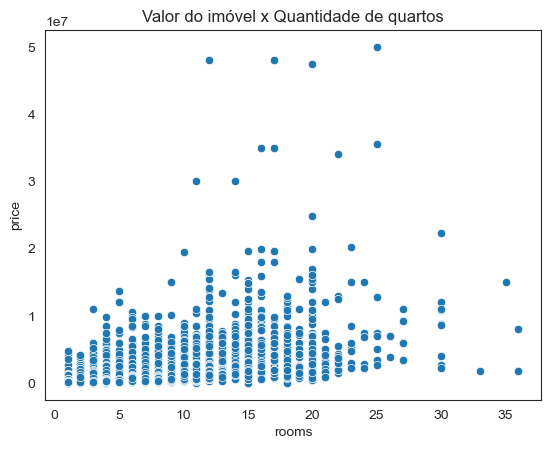

In [115]:
sns.scatterplot(x=df.rooms, y=df.price).set(
    title="Valor do imóvel x Quantidade de quartos"
)

[Text(0.5, 1.0, 'Imóveis por intervalo de preço')]

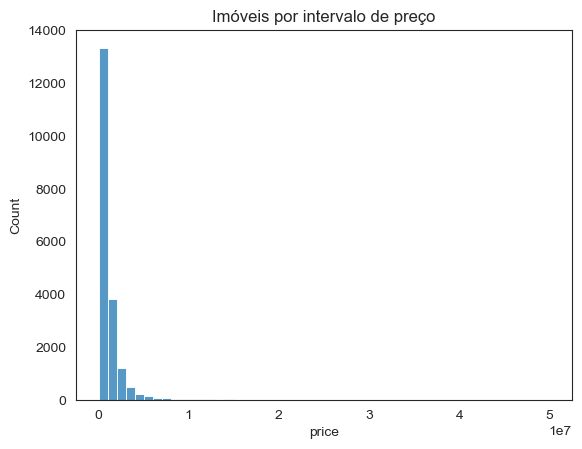

In [116]:
sns.histplot(data=df, x="price", bins=50).set(title="Imóveis por intervalo de preço")

In [117]:
# listar as correlações com a variável price (target)

df_corr.price[:-1].sort_values(ascending=False)

price                         1.000
price_aprox_local_currency    0.983
price_aprox_usd               0.983
surface_covered_in_m2         0.111
price_per_m2                  0.069
price_usd_per_m2              0.069
surface_total_in_m2           0.068
floor                        -0.013
Name: price, dtype: float64

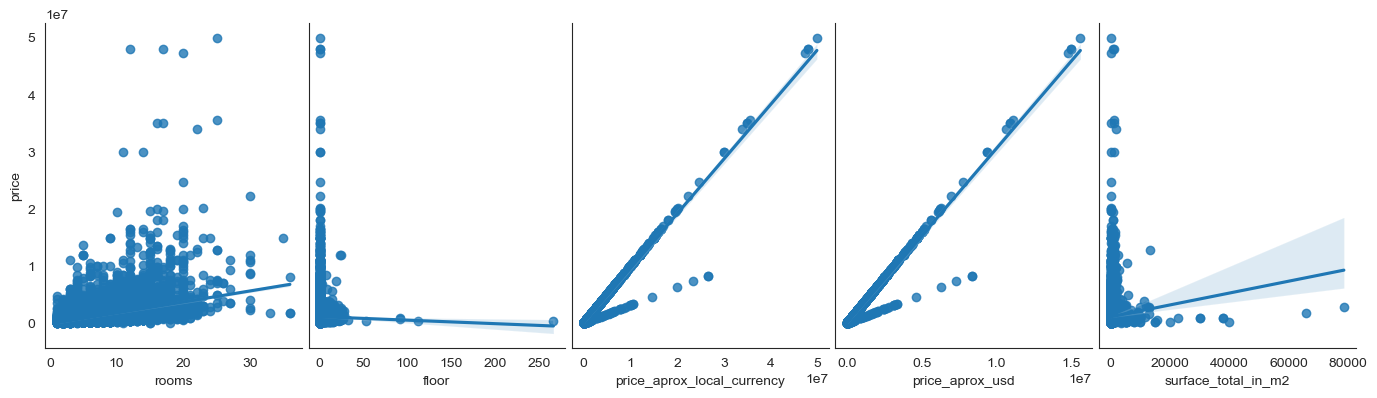

In [118]:
# Apresentar gráfico mostrando as relações entre as variáveis independentes e a dependente (price).
# 1 x 1e7 = 10.000.000

x = [
    "rooms",
    "floor",
    "price_aprox_local_currency",
    "price_aprox_usd",
    "surface_total_in_m2",
]

sns.set_style("white")
sns.pairplot(df, x_vars=x, y_vars="price", height=4, aspect=0.7, kind="reg")

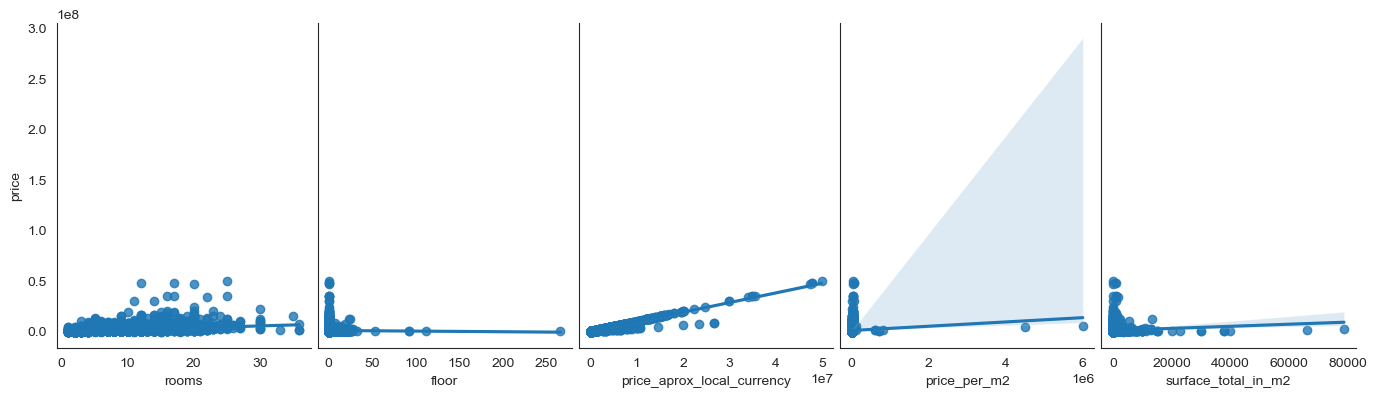

In [119]:
x1 = [
    "rooms",
    "floor",
    "price_aprox_local_currency",
    "price_per_m2",
    "surface_total_in_m2",
]

sns.pairplot(df, x_vars=x1, y_vars="price", height=4, aspect=0.7, kind="reg")

<Axes: >

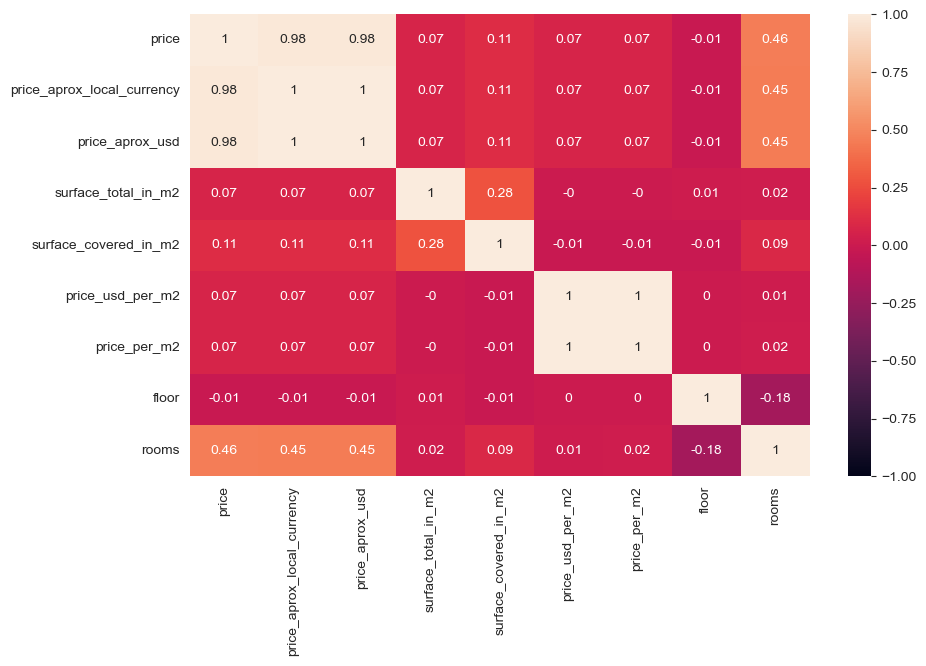

In [120]:
# Matrix de Correlação
# Mostrar mapa de calor (heatmap) da matriz de correlação de todas as variáveis
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_corr.round(2), annot=True, vmin=-1, vmax=1)

In [121]:
# Preparando os dados para o grafico de pizza ou pie ou donuts

lowerdf = df.groupby("property_type").size() / df["place_name"].count() * 100
lowerdf.head()

property_type
PH           0.005
apartment   77.333
house       22.380
store        0.282
dtype: float64

In [122]:
# Gráfico de Pizza

import plotly.offline as pyo
import plotly.graph_objs as go

plt.figure(figsize=(10, 7))
lowerdf1 = df.groupby("property_type").size() / df["place_name"].count() * 100
labels = lowerdf1.index
values = lowerdf1.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6)])
fig.show()

<Figure size 1000x700 with 0 Axes>

##### 2.3 Preparação dos dados para treinamento e testes

O scikit-learn espera que X (matriz de 'features') e y (vetor de resposta) sejam matrizes NumPy. No entanto, o Pandas é construído sobre o NumPy. Assim, X pode ser um Pandas DataFrame e y pode ser uma série do Pandas.


In [123]:
df.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'price',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms'],
      dtype='object')

In [124]:
# atribuir os valores das variáveis independentes a 'X' e 'y' dependente

X = df.drop(["price", "property_type", "place_name", "place_with_parent_names"], axis=1)

# select a Series from the DataFrame
y = df["price"]

print("X = ", X.shape)
print("y = ", y.shape)

X =  (19526, 8)
y =  (19526,)


###### 2.3.1 Ajudar as categorias ( property_type, place_name e place_with_parent_names)


In [125]:
# Como temos dados categóricos, precisamos codificá-los numericamente:
# [property_type,	place_name,	place_with_parent_names]
from sklearn.preprocessing import OrdinalEncoder

In [126]:
enc = OrdinalEncoder().fit(X)

In [127]:
enc.categories_

[array([1.7966279e+04, 1.8964400e+04, 1.9172180e+04, ..., 4.7327360e+07,
        4.7910128e+07, 4.9906384e+07], dtype=float32),
 array([5.6169199e+03, 5.9289702e+03, 5.9939302e+03, ..., 1.4796273e+07,
        1.4978468e+07, 1.5602571e+07], dtype=float32),
 array([0.0000e+00, 1.0000e+01, 1.5000e+01, 1.8000e+01, 2.5000e+01,
        2.6000e+01, 2.8000e+01, 2.9000e+01, 3.0000e+01, 3.1000e+01,
        3.2000e+01, 3.3000e+01, 3.4000e+01, 3.5000e+01, 3.6000e+01,
        3.7000e+01, 3.8000e+01, 3.9000e+01, 4.0000e+01, 4.1000e+01,
        4.2000e+01, 4.3000e+01, 4.4000e+01, 4.5000e+01, 4.6000e+01,
        4.7000e+01, 4.8000e+01, 4.9000e+01, 5.0000e+01, 5.1000e+01,
        5.2000e+01, 5.3000e+01, 5.4000e+01, 5.5000e+01, 5.6000e+01,
        5.7000e+01, 5.8000e+01, 5.9000e+01, 6.0000e+01, 6.1000e+01,
        6.2000e+01, 6.3000e+01, 6.4000e+01, 6.5000e+01, 6.6000e+01,
        6.7000e+01, 6.8000e+01, 6.9000e+01, 7.0000e+01, 7.1000e+01,
        7.2000e+01, 7.3000e+01, 7.4000e+01, 7.5000e+01, 7.6000e+

In [128]:
enc.transform(X)

array([[2.603e+03, 2.603e+03, 2.380e+02, ..., 6.605e+03, 1.100e+01,
        2.000e+00],
       [2.132e+03, 2.132e+03, 1.380e+02, ..., 5.455e+03, 0.000e+00,
        2.000e+00],
       [2.333e+03, 2.333e+03, 1.750e+02, ..., 6.119e+03, 1.000e+01,
        2.000e+00],
       ...,
       [1.947e+03, 1.947e+03, 1.590e+02, ..., 2.558e+03, 0.000e+00,
        5.000e+00],
       [2.351e+03, 2.351e+03, 1.110e+02, ..., 6.192e+03, 0.000e+00,
        9.000e+00],
       [2.714e+03, 2.714e+03, 2.210e+02, ..., 6.259e+03, 0.000e+00,
        1.500e+01]])

##### 2.4 Normalização dos dados

Uma das formas de normalizar as variáveis independentes, é removendo de cada coluna, a sua respectiva média e dividindo pelo seu respectivo desvio padrão.
Se uma feature tem um intervalo de valores que é ordens de magnitude maior que as outras features, ela pode dominar a função objetivo e tornar o modelo incapaz de aprender com outras features corretamente como esperado.

A Normalização de um conjunto de dados é um requisito comum para muitos algoritmos de aprendizado de máquina: eles podem se comportar mal se os recursos individuais não se parecerem mais ou menos com dados normalmente distribuídos padrão (por exemplo, Gaussiano com média 0 e variação unitária.

Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [129]:
# Divide o dataset em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
df_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
df_norm.head()

,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms
0,-0.536,-0.536,-0.067,-0.061,-0.096,-0.096,-0.199,-1.123
1,-0.341,-0.341,0.034,-0.059,-0.057,-0.058,-0.199,-0.877
2,-0.373,-0.373,-0.175,-0.127,0.002,0.003,-0.199,0.105
3,0.035,0.035,0.074,0.013,-0.032,-0.032,-0.199,1.332
4,-0.322,-0.322,0.655,-0.125,0.018,0.018,-0.199,-0.632


In [131]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price_aprox_local_currency  15620 non-null  float64
 1   price_aprox_usd             15620 non-null  float64
 2   surface_total_in_m2         15620 non-null  float64
 3   surface_covered_in_m2       15620 non-null  float64
 4   price_usd_per_m2            15620 non-null  float64
 5   price_per_m2                15620 non-null  float64
 6   floor                       15620 non-null  float64
 7   rooms                       15620 non-null  float64
dtypes: float64(8)
memory usage: 976.4 KB


#### 3. datasets finais


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19526 entries, 794 to 872126
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               19526 non-null  object 
 1   place_name                  19526 non-null  object 
 2   place_with_parent_names     19526 non-null  object 
 3   price                       19526 non-null  float32
 4   price_aprox_local_currency  19526 non-null  float32
 5   price_aprox_usd             19526 non-null  float32
 6   surface_total_in_m2         19526 non-null  float32
 7   surface_covered_in_m2       19526 non-null  float32
 8   price_usd_per_m2            19526 non-null  float32
 9   price_per_m2                19526 non-null  float32
 10  floor                       19526 non-null  int32  
 11  rooms                       19526 non-null  int32  
dtypes: float32(7), int32(2), object(3)
memory usage: 1.3+ MB


In [133]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price_aprox_local_currency  15620 non-null  float64
 1   price_aprox_usd             15620 non-null  float64
 2   surface_total_in_m2         15620 non-null  float64
 3   surface_covered_in_m2       15620 non-null  float64
 4   price_usd_per_m2            15620 non-null  float64
 5   price_per_m2                15620 non-null  float64
 6   floor                       15620 non-null  float64
 7   rooms                       15620 non-null  float64
dtypes: float64(8)
memory usage: 976.4 KB


In [134]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, price to rooms
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       9 non-null      float64
 1   price_aprox_local_currency  9 non-null      float64
 2   price_aprox_usd             9 non-null      float64
 3   surface_total_in_m2         9 non-null      float64
 4   surface_covered_in_m2       9 non-null      float64
 5   price_usd_per_m2            9 non-null      float64
 6   price_per_m2                9 non-null      float64
 7   floor                       9 non-null      float64
 8   rooms                       9 non-null      float64
dtypes: float64(9)
memory usage: 1020.0+ bytes


### II - Treinamento


#### Bibliotecas para treinamento e divisão em treino e teste


In [184]:
# Agora vamos treinar nossa árvore de decisão para uma primeira tentativa
# Pacotes sklearn
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.neighbors import KNeighborsRegressor

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

**Colunas númericas:**

- floor: int
- rooms: int
- price: float
- price_aprox_local_currency: float
- price_aprox_usd: float
- surface_total_in_m2: floar
- surface_covered_in_m2: float
- price_usd_per_m2: float
- price_per_m2: float

**Colunas de classificadores:**

- property_type: categorias => `{'Apart', 'House', 'Store', '...'}`
- place_name: categorias => `{'São Paulo', '...'}`
- place_with_parent_names: categorias => `{'São Paulo|Centro|', '...'}`


##### 1. Regressão Linear


Usando os dados normalizados anteriormente.


In [136]:
X_train.shape, y_train.shape

((15620, 8), (15620,))

In [137]:
X_test.shape, y_test.shape

((3906, 8), (3906,))

In [138]:
# instancia modelo de regressão linear
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)

# Cálculo do R^2 (R-squared) usando o scikit-learn
score_r2 = r2_score(y_test, y_pred)
print(
    "(R Quadrado) R2_score = ", score_r2,
    "ou seja, R2 Captou "+str(score_r2*100)+" % da variabilidade dos seus dados de treinamento.",
)

# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

(R Quadrado) R2_score =  0.9873038072954912 ou seja, R2 Captou 98.73038072954911 % da variabilidade dos seus dados de treinamento.
MAE =  37785.0450029552
MSE =  53267560474.63282
RMSE =  230797.66132834367


##### 2. Regressão Lógistica I (ignorar este estudo !!!)


Nova normatização e ajustes das variaveis X e y


In [139]:
df.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'price',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms'],
      dtype='object')

In [140]:
# usando um dataset temporãrio o dataser sub
sub = df[
    [
        "property_type",
        "place_name",
        "place_with_parent_names",
        "price",
        "price_aprox_local_currency",
        "price_aprox_usd",
        "surface_total_in_m2",
        "surface_covered_in_m2",
        "price_usd_per_m2",
        "price_per_m2",
        "floor",
        "rooms",
    ]
]

In [141]:
X_sub = sub.drop('price', axis=1)
y_sub = sub["price"]

print(X_sub.shape)
print(y_sub.shape)

(19526, 11)
(19526,)


In [142]:
# numericos
numeric_features = [
    "floor",
    "rooms",
    "price_aprox_local_currency",
    "price_aprox_usd",
    "surface_total_in_m2",
    "surface_covered_in_m2",
    "price_usd_per_m2",
    "price_per_m2",
]

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# categorias
categorical_features = ["property_type", "place_name", "place_with_parent_names"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)

## processador
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [143]:
X_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19526 entries, 794 to 872126
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               19526 non-null  object 
 1   place_name                  19526 non-null  object 
 2   place_with_parent_names     19526 non-null  object 
 3   price_aprox_local_currency  19526 non-null  float32
 4   price_aprox_usd             19526 non-null  float32
 5   surface_total_in_m2         19526 non-null  float32
 6   surface_covered_in_m2       19526 non-null  float32
 7   price_usd_per_m2            19526 non-null  float32
 8   price_per_m2                19526 non-null  float32
 9   floor                       19526 non-null  int32  
 10  rooms                       19526 non-null  int32  
dtypes: float32(6), int32(2), object(3)
memory usage: 1.2+ MB


In [144]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [145]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['floor', 'rooms',
                                                   'price_aprox_local_currency',
                                                   'price_aprox_usd',
                                                   'surface_total_in_m2',
                                                   'surface_covered_in_m2',
                                                   'price_usd_per_m2',
                                                   'price_per_m2']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x000002E6778BB2E0>))]),
                                                  ['property_type',
                                                   'place_name',
                                                   'place_with_parent_names'])])),
                ('classifier', LogisticRegression())])

In [146]:
# Partição treino/teste (20%)
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.2, random_state=0)

In [147]:
pipe.fit(X_train_sub, y_train_sub)
print("model score: %.3f" % pipe.score(X_test_sub, y_test_sub))

model score: 0.058


##### 3. Arvore de descisão


In [148]:
X.head(3)

,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms
794,2019190.625,631273.250,260.000,180.000,3507.074,11111.111,12,3
795,969211.500,303011.156,160.000,109.000,2779.919,8807.340,1,3
796,1312474.000,410327.625,197.000,130.000,3156.366,10000.000,11,3


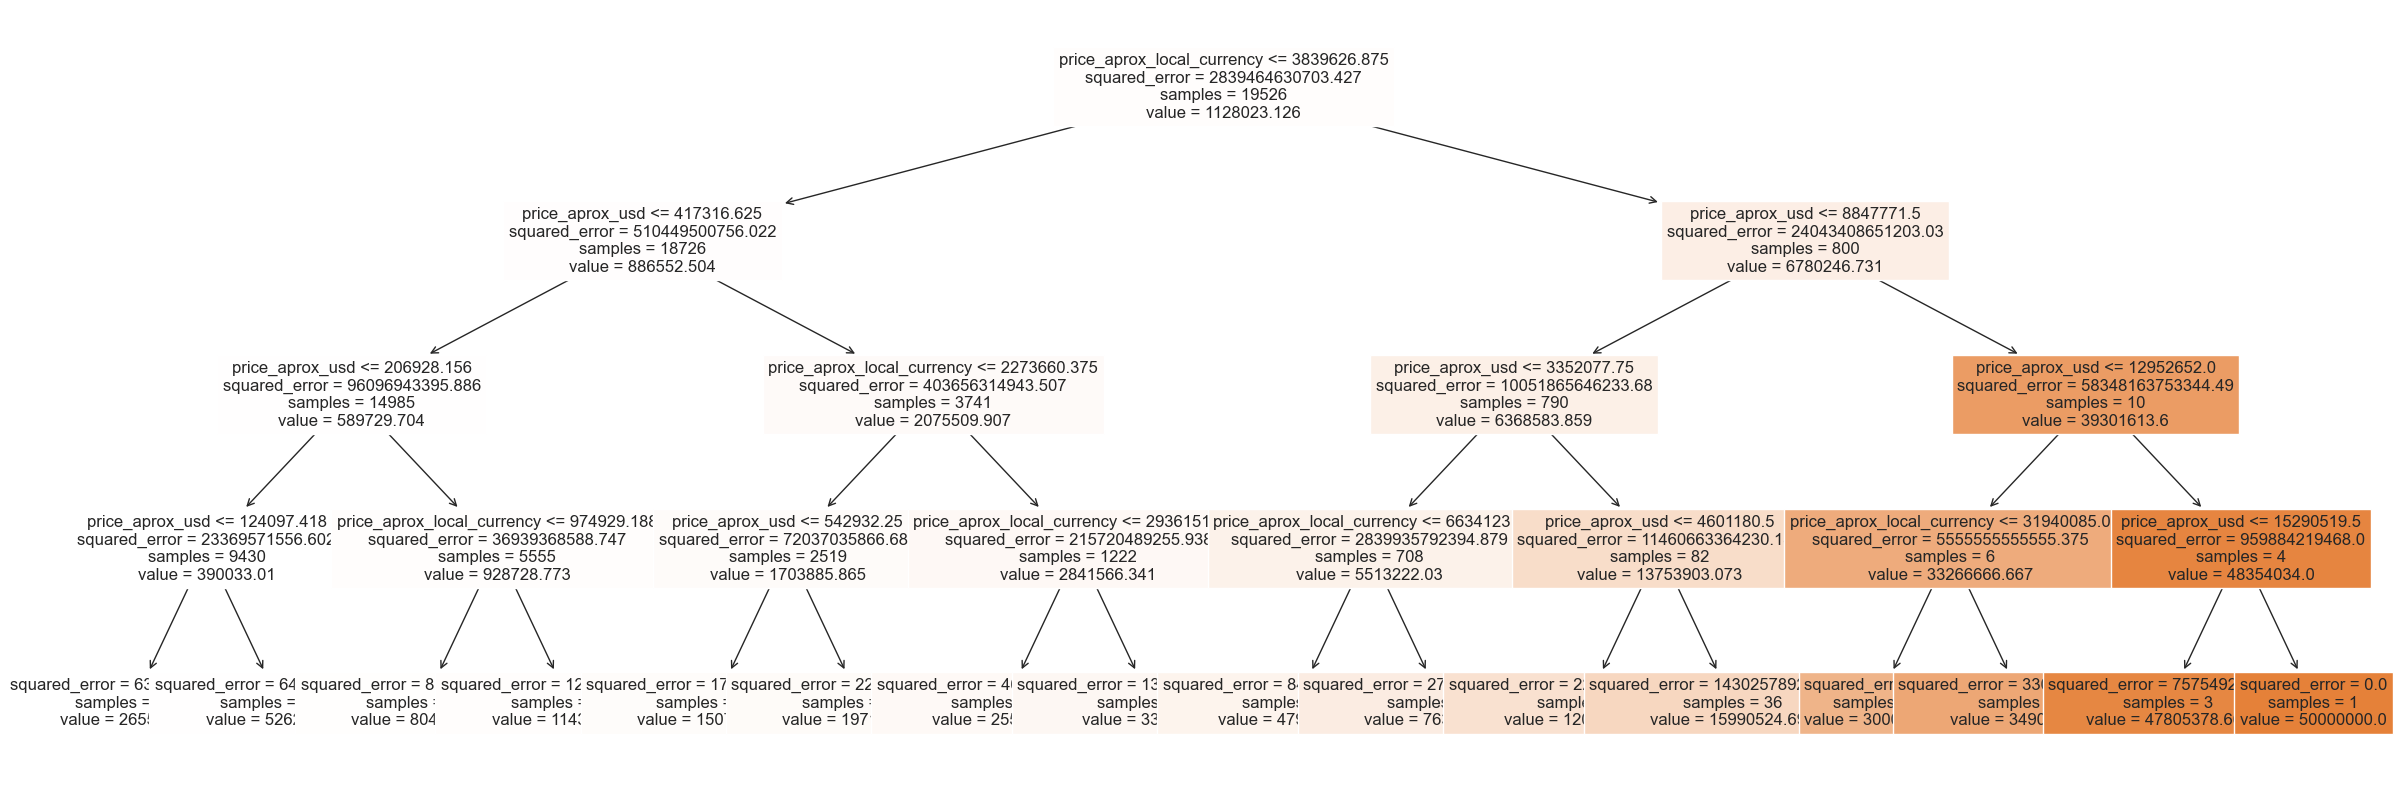

In [177]:

clf = DecisionTreeRegressor(max_depth=4).fit(X, y)

plt.figure(figsize=(30, 10))
plot_tree(clf, filled=True, fontsize=12, feature_names=X.columns)
plt.show()

In [161]:
# AScore
clf.score(X_test, y_test)

0.9775248759525951

##### 4. Random Forest


In [162]:
# Random Forest

rf_class = RandomForestRegressor(max_depth=7).fit(X_train, np.ravel(y_train))
rf_class.score(X_test, y_test)

0.9859897679184689

##### 5. Regressão Logística II


In [164]:
# Regressão Logística

reg_log = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
score_reglog = reg_log.score(X_test, y_test)
print(score_reglog)

0.007936507936507936


### III - Métricas e melhoras nas acuracias


In [181]:
X.head(3)

,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms
794,2019190.625,631273.250,260.000,180.000,3507.074,11111.111,12,3
795,969211.500,303011.156,160.000,109.000,2779.919,8807.340,1,3
796,1312474.000,410327.625,197.000,130.000,3156.366,10000.000,11,3


In [168]:
y.head(3)

794   2000000.000
795    960000.000
796   1300000.000
Name: price, dtype: float32

In [182]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [170]:
# Normalização feita separadamente para não 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [171]:
x_n = sc.transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_n, y, test_size=0.3, random_state=42)

In [172]:
# Regressão Linear
reg_lin = LinearRegression()

reg_lin.fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)

# Cálculo do R^2 (R-squared) usando o scikit-learn
print(
    "R2_score = ",
    r2_score(y_test, y_pred),
    "ou seja,\nR2 Captou "+str(r2_score(y_test, y_pred)*100)+" % da variabilidade dos seus dados de treinamento.",
)

# Cálculos do MAE, MSE e RMSE.
print("\nMAE = ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2_score =  0.9922778143925164 ou seja,
R2 Captou 99.22778143925164 % da variabilidade dos seus dados de treinamento.

MAE =  33962.03375733701
MSE =  17272574251.18438
RMSE =  131425.16597358507


In [173]:
score_lr = reg_lin.score(X_train, y_train)
print(score_lr)

0.9857014433020237


In [187]:
# Modelo Random Forest

rf_class = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=100).fit(X_train, np.ravel(y_train))

score_rfr = rf_class.score(X_test, y_test)
print(score_rfr)

0.9781926395843381


In [206]:
# Modelo KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, np.ravel(y_train))
# knn.fit(X,y)

score_knr = knn.score(X_test, y_test)
print(score_knr)

0.9591203686952827


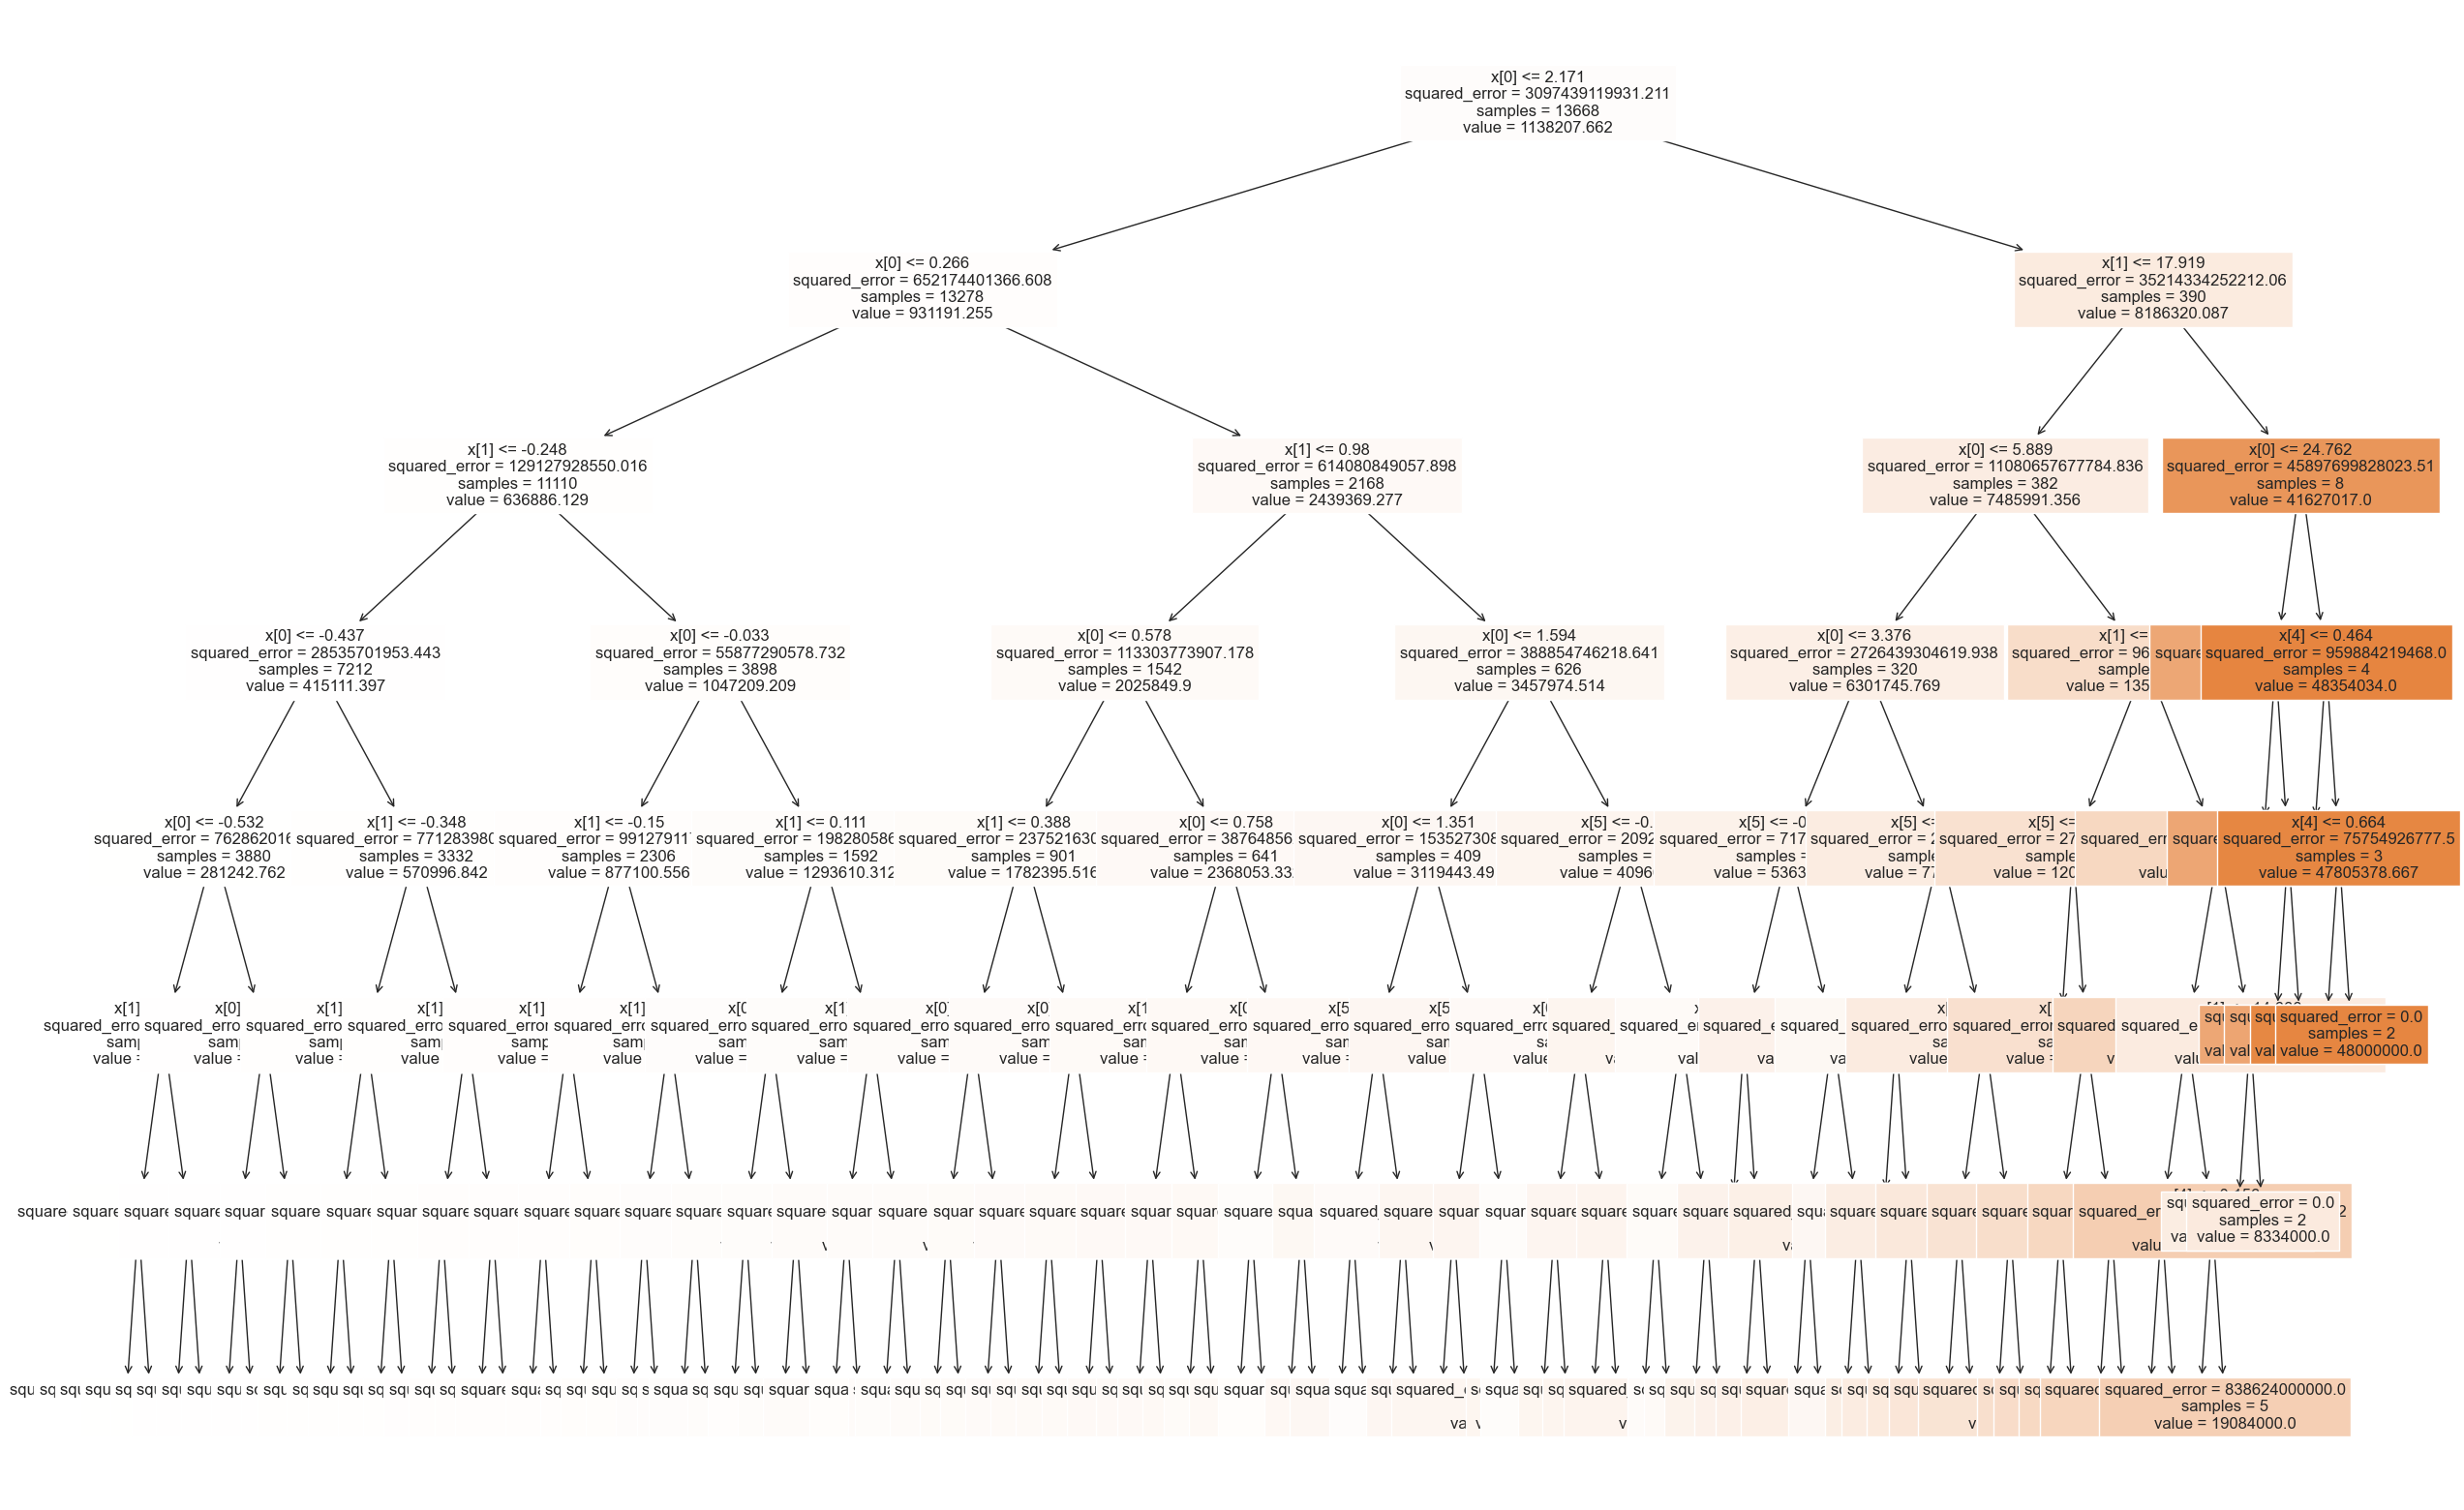

In [224]:
# Modelo DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=7).fit(X_train, np.ravel(y_train))

plt.figure(figsize=(30, 20))
plot_tree(clf, filled=True, fontsize=12)
plt.show()

In [215]:
# Modelo usando  com AdaBoostRegressor

rng = np.random.RandomState(1)

In [245]:
# Divide o dataset em treino e teste (80/20)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [251]:
regr_1 = DecisionTreeRegressor(max_depth=7).fit(X_train, np.ravel(y_train))

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=7), n_estimators=100, random_state=rng
).fit(X_train, np.ravel(y_train))


XX = X_test
yy = np.ravel(y_test)

y_1 = regr_1.predict(XX)
y_2 = regr_2.predict(XX)

# print(y_1)

In [253]:
regr_2.score(XX, yy)

0.8987207313021837

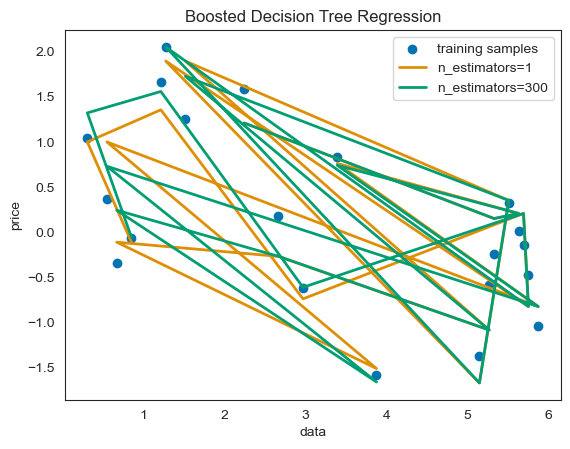

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(XX, yy, color=colors[0], label="training samples")
plt.plot(XX, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(XX, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("price")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [244]:
score_regr_2 = regr_2.score(X, y)
print(score_regr_2)

0.9780665402980383


In [ ]:
# Árvore de decisão
clf = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)

score_dtr = clf.score(X_test, y_test)
print(score_dtr)

0.9235919945134711


In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.3) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

# print('Treino: ', Ridge_train_score)
# print('Test: ', Ridge_test_score)

score_ridge = rr.score(X_train, y_train)
print(score_ridge)

0.9808593891561433


In [ ]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression().fit(X_train, y_train)
reg_log.score(X_test, y_test)



0.050870604301809494

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Lasso
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.5, tol=0.001)
clf.fit(X_test,y_test)
# print(clf.coef_)
# print(clf.intercept_)

score_lasso=clf.score(X_test,y_test)
print(score_lasso)

0.9921901098822394


### IV - Conclusões


In [165]:
print('MODELOS\n')

print('r2: ', score_r2)
print('\bLinearRegression() => n-score: ', score_lr)
print('\bLogistcRegression() => score: ', score_reglog)
print('\nRandomForestRegressor(max_depth=7) => score: ', score_rfr)
print('\nLasso(alpha=0.5, tol=0.001) => score: ', score_lasso)
print('\nRidge(alpha=0.3) => score:', score_ridge)
print('\nDecisionTreeRegressor() => score: ', score_dtr)
print('\nKNeighborsRegressor() => score: ', store_knr)

MODELOS

r2:  0.9873038072954912


NameError: name 'score_lr' is not defined